In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
pilot = pd.read_excel('Pilot.xlsx')
print(pilot)

       x1      x2      x3      x4      x5      x6
0  0.0574  0.0570  0.0565  0.0558  0.0540  0.0556
1  0.0543  0.0585  0.0556  0.0551  0.0562  0.0563
2  0.0554  0.0550  0.0555  0.0551  0.0558  0.0544
3  0.0576  0.0580  0.0570  0.0580  0.0580  0.0569
4  0.0568  0.0570  0.0560  0.0570  0.0570  0.0560
5  0.0572  0.0580  0.0590  0.0580  0.0570  0.0570
6  0.0576  0.0560  0.0570  0.0580  0.0570  0.0550
7  0.0554  0.0560  0.0580  0.0580  0.0560  0.0550
8  0.0555  0.0570  0.0560  0.0550  0.0536  0.0544
9  0.0570  0.0566  0.0558  0.0550  0.0554  0.0556


In [6]:
oversikt = pilot.apply(pd.DataFrame.describe,axis=1)
display(oversikt)

,count,mean,std,min,25%,50%,75%,max
0,6.0,0.056050,0.001216,0.0540,0.055650,0.05615,0.056875,0.0574
1,6.0,0.056000,0.001431,0.0543,0.055225,0.05590,0.056275,0.0585
2,6.0,0.055200,0.000486,0.0544,0.055025,0.05525,0.055475,0.0558
3,6.0,0.057583,0.000515,0.0569,0.057150,0.05780,0.058000,0.0580
4,6.0,0.056633,0.000497,0.0560,0.056200,0.05690,0.057000,0.0570
5,6.0,0.057700,0.000787,0.0570,0.057050,0.05760,0.058000,0.0590
6,6.0,0.056767,0.001098,0.0550,0.056250,0.05700,0.057450,0.0580
7,6.0,0.056400,0.001296,0.0550,0.055550,0.05600,0.057500,0.0580
8,6.0,0.055250,0.001200,0.0536,0.054550,0.05525,0.055875,0.0570
9,6.0,0.055900,0.000756,0.0550,0.055450,0.05570,0.056400,0.0570


In [8]:
pilot_tabell = pilot.to_numpy().flatten()
print(pilot_tabell)

[0.0574 0.057  0.0565 0.0558 0.054  0.0556 0.0543 0.0585 0.0556 0.0551
 0.0562 0.0563 0.0554 0.055  0.0555 0.0551 0.0558 0.0544 0.0576 0.058
 0.057  0.058  0.058  0.0569 0.0568 0.057  0.056  0.057  0.057  0.056
 0.0572 0.058  0.059  0.058  0.057  0.057  0.0576 0.056  0.057  0.058
 0.057  0.055  0.0554 0.056  0.058  0.058  0.056  0.055  0.0555 0.057
 0.056  0.055  0.0536 0.0544 0.057  0.0566 0.0558 0.055  0.0554 0.0556]


(array([ 2.,  3.,  7.,  8., 10.,  4., 13.,  3.,  8.,  2.]),
 array([0.0536 , 0.05414, 0.05468, 0.05522, 0.05576, 0.0563 , 0.05684,
        0.05738, 0.05792, 0.05846, 0.059  ]),
 <BarContainer object of 10 artists>)

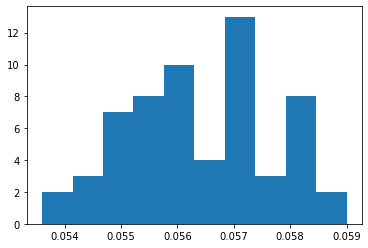

In [11]:
plt.figure()
#plt.plot(pilot_tabell)
plt.hist(pilot_tabell)

In [15]:
#Standardavvik for hver serie
xm_i = pilot.mean(axis=1)
#Middelverdi av standardavvikene
xmm = xm_i.mean()
s_i = pilot.std(axis=1)
s2_i = s_i**2
s2m = s2_i.mean()
sm = np.sqrt(s2m)
print(xmm,sm)

0.056348333333333334 0.0009895958771134817


0.0009895958771134817


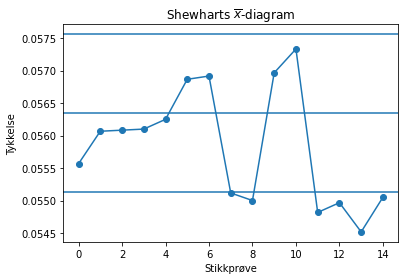

In [30]:
tykkelse = pd.read_excel('Tykkelse.xlsx')
#Standardavvik for hver serie
xm_i = tykkelse.mean(axis=1)
#Øvre og nedre kontrollgrense
n = tykkelse.shape[1]
CL = xmm - 3*sm/np.sqrt(n)
CU = xmm + 3*sm/np.sqrt(n)
print(sm)
plt.figure()
plt.xlabel('Stikkprøve')
plt.ylabel('Tykkelse')
plt.title('Shewharts $\overline{x}$-diagram')
plt.axhline(xmm)
plt.axhline(CL)
plt.axhline(CU)
plt.plot(xm_i,'o-')

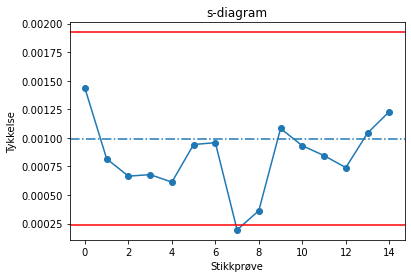

In [29]:
s_i=tykkelse.std(axis=1)
nedre = sm*np.sqrt(stats.chi2.ppf(0.002,n-1)/(n-1))
ovre = sm*np.sqrt(stats.chi2.ppf(1-0.002,n-1)/(n-1))
plt.figure()
plt.xlabel('Stikkprøve')
plt.ylabel('Tykkelse')
plt.title('s-diagram')
plt.plot(s_i,'o-')
plt.axhline(sm,linestyle='-.')
plt.axhline(nedre,color='r')
plt.axhline(ovre,color='r')
plt.savefig('s.png')